In [1]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import jax
import jax.numpy as np
import optax

In [9]:
from functools import partial

In [3]:
import rl_capital as rlc
import rl_tools as rlt

In [32]:
kpoly, theta = rlc.solve_iterate(R=2000, Δk=0.01, Δv=0.001)
value = rlc.val_vec(rlc.kgrid, theta)
valuep = rlc.eval_policy_vec(rlc.kgrid, kpoly, theta)
kgrad = rlc.grad_policy_vec(rlc.kgrid, kpoly, theta)
theta

DeviceArray([1.2756598 , 0.8927188 , 0.00631762], dtype=float32)

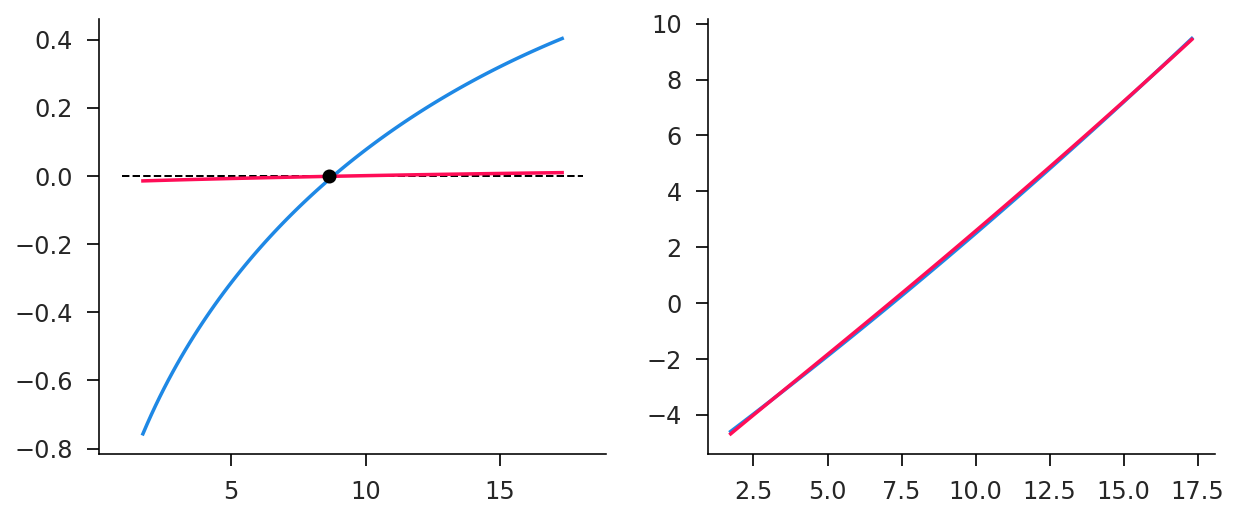

In [33]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rlc.kgrid, kpoly-rlc.kgrid, rlc.kgrid, kgrad)
ax1.plot(rlc.kgrid, value, rlc.kgrid, valuep)
ax0.hlines(0, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(rlc.kss, 0, color='k', zorder=10);